In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.cluster import KMeans
import copy

In [3]:
cust_seg = pd.read_csv('/content/drive/Othercomputers/My Laptop/data-science-assignments/09 - Clustering Algorithms/cust_seg.csv')
cust_seg.head()

,Unnamed: 0,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,4,5,47,1,31,253,9.308,8.908,0.0,7.2


In [10]:
def calculateKMeans(entire_df, xAxis, yAxis):
    # Trying to ensure memory leakage and index chaining is prevented
    # Taking a copy of entire dataframe with deepcopy and using .loc as recommended in the documentation
    # https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
    copy_df = copy.deepcopy(entire_df)
    df = copy_df.loc[:,(xAxis,yAxis)]
    # Instantiate Standard Scaler
    scaler = StandardScaler()
    # Fit & transform data
    scaled_df = scaler.fit_transform(df)

    # Instantiate KMeans
    kmeans = KMeans(n_clusters = 4)
    kmeans.fit(scaled_df)

    # Save the cluster labels to the dataframe
    df['cluster'] = kmeans.labels_

    # Visualize data
    plt.scatter(df[xAxis], df[yAxis], c = df['cluster']);
    plt.xlabel(xAxis)
    plt.ylabel(yAxis)
    plt.title('Cluster of Customers based on {} {}'.format(xAxis, yAxis))
    plt.show()

In [11]:
cust_seg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       850 non-null    int64  
 1   Customer Id      850 non-null    int64  
 2   Age              850 non-null    int64  
 3   Edu              850 non-null    int64  
 4   Years Employed   850 non-null    int64  
 5   Income           850 non-null    int64  
 6   Card Debt        850 non-null    float64
 7   Other Debt       850 non-null    float64
 8   Defaulted        700 non-null    float64
 9   DebtIncomeRatio  850 non-null    float64
dtypes: float64(4), int64(6)
memory usage: 66.5 KB


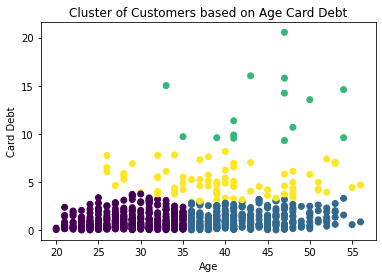

Higher Card Debt with higher age either due to carrying 
more debt over the years or higher purchasing power



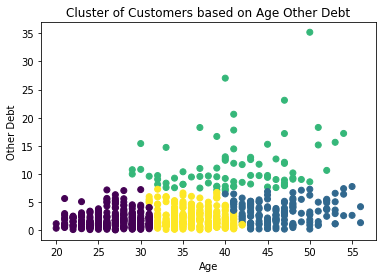

Similar to Card Debt, even higher Other Debt, 
based on the y-axis scale, with age this debt could be larger 
purchases or transactions such mortgages, vehicle or business investments



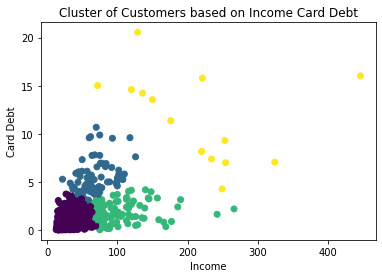

Card debt level is very close for income levels below 100,
the breakout income level is after 200 where higher levels of Card Debt
is observed


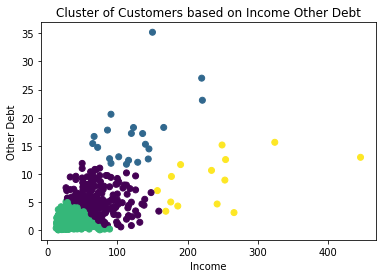

Would be interesting to see how Age and Income line up around Other Debt


In [12]:
calculateKMeans(cust_seg, 'Age','Card Debt')
print("Higher Card Debt with higher age either due to carrying \n" \
"more debt over the years or higher purchasing power\n")

calculateKMeans(cust_seg, 'Age','Other Debt')
print("Similar to Card Debt, even higher Other Debt, \n" \
      "based on the y-axis scale, with age this debt could be larger \n" \
      "purchases or transactions such mortgages, vehicle or business investments\n")

calculateKMeans(cust_seg, 'Income','Card Debt')
print("Card debt level is very close for income levels below 100,\n" \
      "the breakout income level is after 200 where higher levels of Card Debt\n" \
      "is observed")

calculateKMeans(cust_seg, 'Income','Other Debt')
print("Would be interesting to see how Age and Income line up around Other Debt")